# Analysis

In this tutorial, we introduce the basic analysis of proxies with `p2k`.

In [1]:
%load_ext autoreload
%autoreload 2

import p2k
import pandas as pd
import numpy as np

## Load the PAGES2k network stored in a pandas `DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

In [3]:
pdb = p2k.ProxyDatabase().from_df(df)
pdb

## Annualize a `ProxyRecord`

In [4]:
pdb_coral_d18O = pdb.filter(by='ptype', keys=['coral.d18O'])

1659.625 1995.625


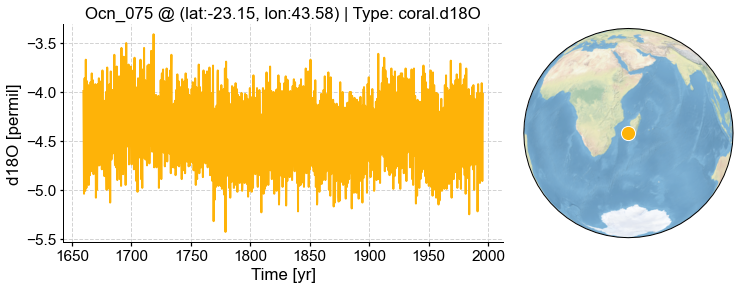

In [5]:
pobj = pdb_coral_d18O.records['Ocn_075']
fig, ax = pobj.plot()
print(pobj.time[0], pobj.time[-1])

1659.0 1995.0


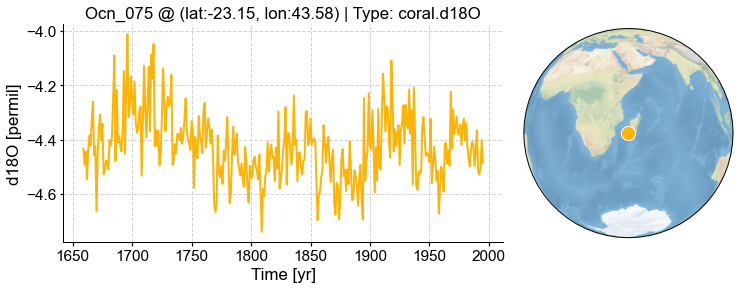

In [6]:
# annaulize by calendar year
spobj = pobj.annualize()
fig, ax = spobj.plot()
print(spobj.time[0], spobj.time[-1])

1659.0 1995.0


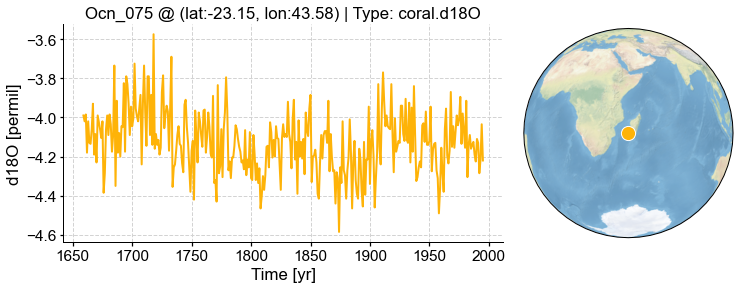

In [7]:
# annaulize by a season
spobj = pobj.annualize(months=[6, 7, 8])
fig, ax = spobj.plot()
print(spobj.time[0], spobj.time[-1])

1660.0 1995.0


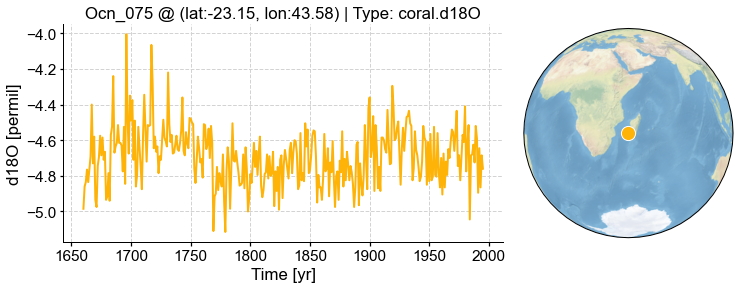

In [8]:
# annaulize by a season
spobj = pobj.annualize(months=[12, 1, 2])
fig, ax = spobj.plot()
print(spobj.time[0], spobj.time[-1])

1660.0 1995.0


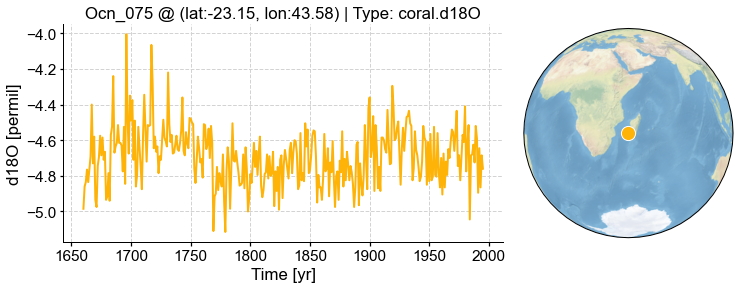

In [10]:
# annaulize by a season
spobj = pobj.annualize(months=[-12, 1, 2])
fig, ax = spobj.plot()
print(spobj.time[0], spobj.time[-1])

## Annualize a `ProxyDatabase`

In [9]:
spdb_coral_d18O = pdb_coral_d18O.annualize()

Annualizing ProxyRecord: 100%|██████████████████| 67/67 [00:02<00:00, 22.94it/s]


## A test of the `p2k.utils.annualize()` function

In [19]:
import xarray as xr

data_list = []
for y in range(1990, 2021):
    data_list.append(np.arange(1, 13))
    
data = np.stack(data_list)

t_stamps = []
for y in range(1990, 2021):
    for m in range(1, 13):
        t_stamps.append(f'{y}-{m}-1')
        
t = pd.to_datetime(t_stamps)
da = xr.DataArray(data.flatten(), dims=['time'], coords={'time': t})

In [26]:
year_float = p2k.utils.datetime2year_float(da.time.values)
year_ann, value_ann = p2k.utils.annualize(year_float, da.values, months=[12, 1])
print(year_ann)
print(value_ann)

[1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001.
 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2015. 2016. 2017. 2018. 2019. 2020.]
[1.  6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5
 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5 6.5]
